In [2]:
## Start of Program

#Import APIs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Style of Plots
plt.style.use('fivethirtyeight')

# Read files
df = pd.read_csv("Plane Crash dataset.csv")

# Convert specific columns from objects to strings
#df = df.astype({'Country':'string'})
#df = df.astype({'Aircraft':'string'})
#df = df.astype({'Crash cause':'string'})
# CH I don't think this is needed. objects in Pandas are just strings (categories)
# https://pbpython.com/pandas_dtypes.html
# and my stuff works w/o and explicit string conversion.
# I guess you could have used astype("category") here but again it doesn't seem to be needed
# Note: if you ever have integers but they are in fact categories (e.g. zip codes) you
# must first convert them to a categorical data type


## Display first 3 rows + data points (DEBUG)
display(df.head(3))  # head(10) top 10 rows only, display: fancy jupyter print()
display(df.dtypes)

print('Success.')

,Country,Year,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,...,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Date
0,United States of America,1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),...,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,5/2/18
1,United Kingdom,1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),...,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,6/8/18
2,Egypt,1918,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",...,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown,6/11/18


Country              object
Year                  int64
Time                 object
Aircraft             object
Operator             object
Registration         object
Flight phase         object
Flight type          object
Survivors            object
Crash site           object
Schedule             object
MSN                  object
YOM                 float64
Flight no.           object
Crash location       object
Unnamed: 15         float64
Region               object
Crew on board       float64
Crew fatalities     float64
Pax on board        float64
PAX fatalities      float64
Other fatalities    float64
Total fatalities      int64
Circumstances        object
Crash cause          object
Date                 object
dtype: object

Success.


158735


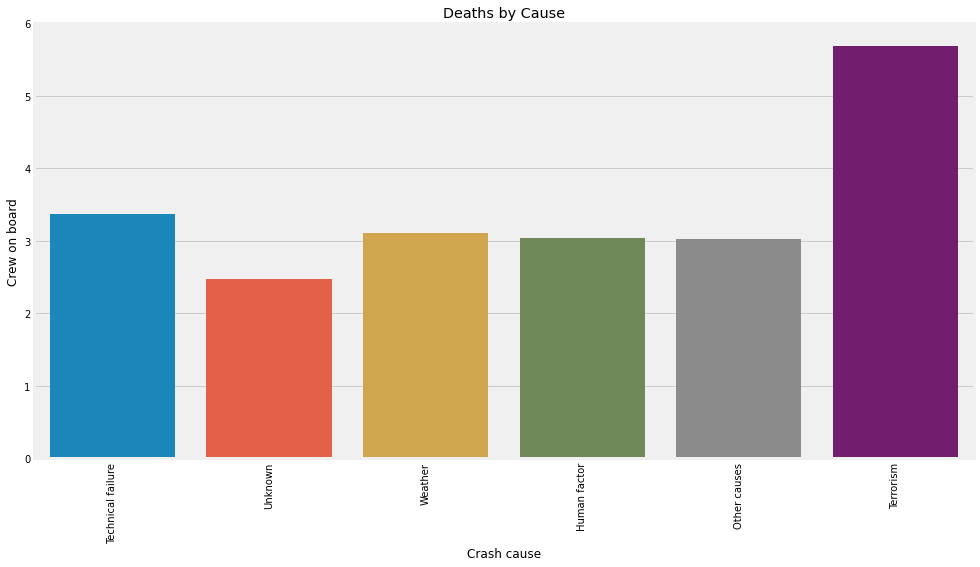

In [3]:
##          Deaths by Crash Cause       ##

import seaborn as sns

plt.style.use('fivethirtyeight')               # works but you should also check out the seaborn themes
#                                              #sns.set_theme(style="whitegrid")


#Split fig from ax (don't fully understand)
fig, ax = plt.subplots(figsize=(15, 8)) 


# subplots() returns 2 values: fig and ax:
# fig is the entire virtual paper, ax is a plot or set of sub-plots
# subplots are addressed in a grid coordinate pattern within the ax  
# note we're not actually requesting sub-plots here but I guess subplot() w/o anything is just a single plot(?)


# https://seaborn.pydata.org/generated/seaborn.barplot.html

ax = sns.barplot(x="Crash cause", y="Crew on board",            # which columns for x and y
                    data=df,                                    # in which dataframe
                    ci=0,                                       # no error bars (much faster!)
                    ) 

# Set x,y ticks; rotate xticks, make title
plt.xticks(rotation=90)
ax.set_title('Deaths by Cause')
plt.ylim(0, 6)


Total = df['Total fatalities'].sum()
print (Total)



Text(0.5, 0.98, 'Fatalities py Country')

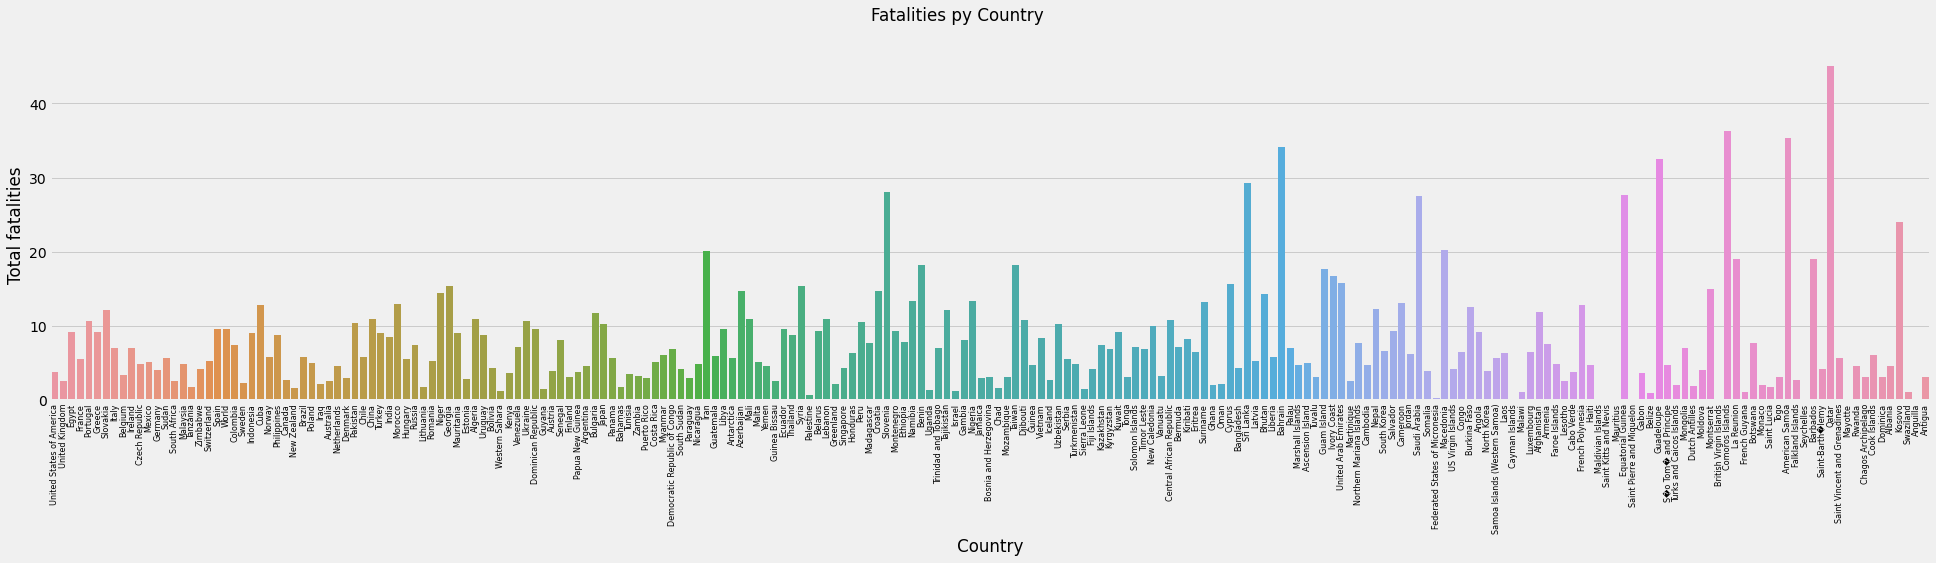

In [10]:
fig, ax = plt.subplots(figsize=(30, 6))  # new plot

ax = sns.barplot(x="Country", y="Total fatalities", # which columns for x and y
                    data=df, # in which dataframe
                    ci=0, # no error bars (much faster!)
                    ) 


plt.xticks(rotation=90)
ax.tick_params(axis='x', which='both', labelsize=8)
fig.suptitle('Fatalities py Country') # Not sure how this is different from ax.set_title ...

Text(0.5, 0.98, 'Fatalities by Year')

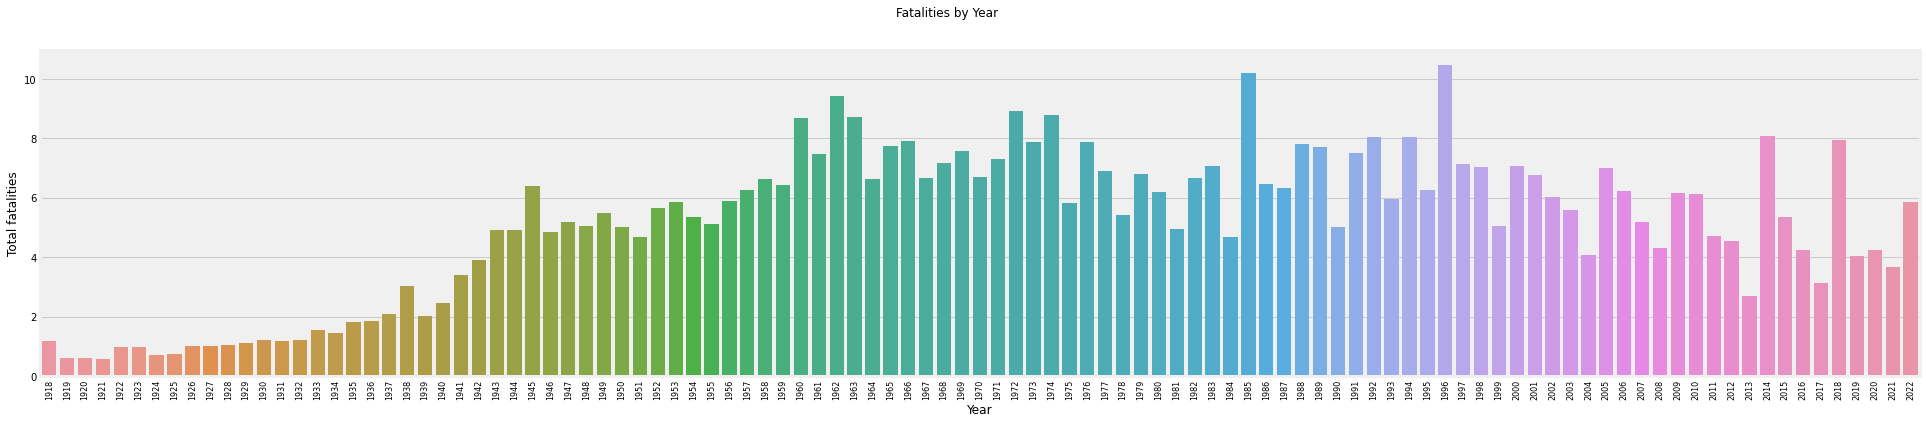

In [4]:
fig, ax = plt.subplots(figsize=(30, 6))  # new plot

ax = sns.barplot(x="Year", y="Total fatalities", # which columns for x and y
                    data=df, # in which dataframe
                    ci=0, # no error bars (much faster!)
                    ) 


plt.xticks(rotation=90)
ax.tick_params(axis='x', which='both', labelsize=8)
fig.suptitle('Fatalities by Year') # Not sure how this is different from ax.set_title ...